In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy import constants as const

In [138]:
g_2 = pd.read_csv('g_2.csv')
g_s = pd.read_csv('g_s.csv')

In [139]:
display(g_2.head())
display(g_s.head())

,iGalID,iGrID,Name,RAJ2000_x,DEJ2000_x,z_x,logMstar_x,RAJ2000_y,DEJ2000_y,z_y,...,logLobs,logMtot,logMstar_y,NMstar,logMdyn,sigma,Rad,angRad,DL,Ntot
0,15983,1069,02570921+0519153,44.288391,5.32091,0.024036,11.04765,44.423199,6.02693,0.023551,...,12.46836,14.44997,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32
1,41930,1069,02533752+0603392,43.406349,6.06101,0.024890,NaN,44.423199,6.02693,0.023551,...,12.46836,14.44997,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32
2,34664,1069,02574211+0525562,44.425579,5.43222,0.024612,NaN,44.423199,6.02693,0.023551,...,12.46836,14.44997,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32
3,35170,1069,02574458+0540192,44.435841,5.67208,0.023848,NaN,44.423199,6.02693,0.023551,...,12.46836,14.44997,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32
4,42129,1069,02575838+0546592,44.493309,5.78307,0.019647,NaN,44.423199,6.02693,0.023551,...,12.46836,14.44997,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32


,iGalID,iGrID,Name,RAJ2000_x,DEJ2000_x,z_x,logMstar_x,Dist_x,RAJ2000_y,DEJ2000_y,...,logMtot,logMstar_y,NMstar,logMdyn,sigma,Rad,angRad,DL,Ntot,Dist_y
0,151723,82182,1237661121851687040,50.787243,40.294140,0.014498,NaN,,49.179073,41.324898,...,14.77303,NaN,0,12.5893,834.796,799.3362,0.701477,67.4165,141,
1,148781,82182,1237661121851687044,50.792912,40.299427,0.013492,NaN,,49.179073,41.324898,...,14.77303,NaN,0,12.5893,834.796,799.3362,0.701477,67.4165,141,
2,151724,82182,1237661121851687072,50.852291,40.355141,0.016187,NaN,,49.179073,41.324898,...,14.77303,NaN,0,12.5893,834.796,799.3362,0.701477,67.4165,141,
3,149988,82182,1237661083199734382,50.953522,40.557800,0.017263,NaN,,49.179073,41.324898,...,14.77303,NaN,0,12.5893,834.796,799.3362,0.701477,67.4165,141,
4,144611,82182,1237661059574858087,51.166824,40.814262,0.017700,NaN,,49.179073,41.324898,...,14.77303,NaN,0,12.5893,834.796,799.3362,0.701477,67.4165,141,


In [140]:
#Вычисляем расстояние по красному смещению.
g_2['Ro_1'] = astropy.coordinates.Distance(z=g_2.z_x)
g_2['Ro_0'] = astropy.coordinates.Distance(z=g_2.z_y)

g_s['Ro_1'] = astropy.coordinates.Distance(z=g_s.z_x)
g_s['Ro_0'] = astropy.coordinates.Distance(z=g_s.z_y)

In [141]:
display(g_2.head())
display(g_s.head())

,iGalID,iGrID,Name,RAJ2000_x,DEJ2000_x,z_x,logMstar_x,RAJ2000_y,DEJ2000_y,z_y,...,logMstar_y,NMstar,logMdyn,sigma,Rad,angRad,DL,Ntot,Ro_1,Ro_0
0,15983,1069,02570921+0519153,44.288391,5.32091,0.024036,11.04765,44.423199,6.02693,0.023551,...,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32,108.323505,106.096866
1,41930,1069,02533752+0603392,43.406349,6.06101,0.024890,NaN,44.423199,6.02693,0.023551,...,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32,112.241791,106.096866
2,34664,1069,02574211+0525562,44.425579,5.43222,0.024612,NaN,44.423199,6.02693,0.023551,...,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32,110.965306,106.096866
3,35170,1069,02574458+0540192,44.435841,5.67208,0.023848,NaN,44.423199,6.02693,0.023551,...,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32,107.460360,106.096866
4,42129,1069,02575838+0546592,44.493309,5.78307,0.019647,NaN,44.423199,6.02693,0.023551,...,11.73111,4,12.0069,489.3147,608.5851,0.370252,98.6641,32,88.254843,106.096866


,iGalID,iGrID,Name,RAJ2000_x,DEJ2000_x,z_x,logMstar_x,Dist_x,RAJ2000_y,DEJ2000_y,...,NMstar,logMdyn,sigma,Rad,angRad,DL,Ntot,Dist_y,Ro_1,Ro_0
0,151723,82182,1237661121851687040,50.787243,40.294140,0.014498,NaN,,49.179073,41.324898,...,0,12.5893,834.796,799.3362,0.701477,67.4165,141,,64.871916,72.534695
1,148781,82182,1237661121851687044,50.792912,40.299427,0.013492,NaN,,49.179073,41.324898,...,0,12.5893,834.796,799.3362,0.701477,67.4165,141,,60.326080,72.534695
2,151724,82182,1237661121851687072,50.852291,40.355141,0.016187,NaN,,49.179073,41.324898,...,0,12.5893,834.796,799.3362,0.701477,67.4165,141,,72.524265,72.534695
3,149988,82182,1237661083199734382,50.953522,40.557800,0.017263,NaN,,49.179073,41.324898,...,0,12.5893,834.796,799.3362,0.701477,67.4165,141,,77.407053,72.534695
4,144611,82182,1237661059574858087,51.166824,40.814262,0.017700,NaN,,49.179073,41.324898,...,0,12.5893,834.796,799.3362,0.701477,67.4165,141,,79.393872,72.534695


In [142]:
#Считаем x,y,z координаты и сохраняем их вместе.

g_2['coords_0'] = np.column_stack([(g_2['Ro_0']*np.cos(g_2['RAJ2000_y'])*np.cos(g_2['DEJ2000_y'])).tolist(),
                                   (g_2['Ro_0']*np.sin(g_2['RAJ2000_y'])*np.cos(g_2['DEJ2000_y'])).tolist(),
                                   (g_2['Ro_0']*np.sin(g_2['DEJ2000_y'])).tolist()]).tolist()

g_2['coords_1'] = np.column_stack([(g_2['Ro_1']*np.cos(g_2['RAJ2000_x'])*np.cos(g_2['DEJ2000_x'])).tolist(),
                                   (g_2['Ro_1']*np.sin(g_2['RAJ2000_x'])*np.cos(g_2['DEJ2000_x'])).tolist(),
                                   (g_2['Ro_1']*np.sin(g_2['DEJ2000_x'])).tolist()]).tolist()

g_s['coords_0'] = np.column_stack([(g_s['Ro_0']*np.cos(g_s['RAJ2000_y'])*np.cos(g_s['DEJ2000_y'])).tolist(),
                                   (g_s['Ro_0']*np.sin(g_s['RAJ2000_y'])*np.cos(g_s['DEJ2000_y'])).tolist(),
                                   (g_s['Ro_0']*np.sin(g_s['DEJ2000_y'])).tolist()]).tolist()

g_s['coords_1'] = np.column_stack([(g_s['Ro_1']*np.cos(g_s['RAJ2000_x'])*np.cos(g_s['DEJ2000_x'])).tolist(),
                                   (g_s['Ro_1']*np.sin(g_s['RAJ2000_x'])*np.cos(g_s['DEJ2000_x'])).tolist(),
                                   (g_s['Ro_1']*np.sin(g_s['DEJ2000_x'])).tolist()]).tolist()

In [143]:
#Для удобства работы приведем к удобному типу
g_2.coords_0 = g_2.coords_0.apply(np.array)
g_2.coords_1 = g_2.coords_1.apply(np.array)
g_s.coords_0 = g_s.coords_0.apply(np.array)
g_s.coords_1 = g_s.coords_1.apply(np.array)

In [144]:
display(g_2.head())
display(g_s.head())

,iGalID,iGrID,Name,RAJ2000_x,DEJ2000_x,z_x,logMstar_x,RAJ2000_y,DEJ2000_y,z_y,...,logMdyn,sigma,Rad,angRad,DL,Ntot,Ro_1,Ro_0,coords_0,coords_1
0,15983,1069,02570921+0519153,44.288391,5.32091,0.024036,11.04765,44.423199,6.02693,0.023551,...,12.0069,489.3147,608.5851,0.370252,98.6641,32,108.323505,106.096866,"[92.8173526003173, 43.79887133110164, -26.8913...","[59.045285314846986, 18.659846951550087, -88.8..."
1,41930,1069,02533752+0603392,43.406349,6.06101,0.024890,NaN,44.423199,6.02693,0.023551,...,12.0069,489.3147,608.5851,0.370252,98.6641,32,112.241791,106.096866,"[92.8173526003173, 43.79887133110164, -26.8913...","[91.8207501586845, -59.62769778360076, -24.732..."
2,34664,1069,02574211+0525562,44.425579,5.43222,0.024612,NaN,44.423199,6.02693,0.023551,...,12.0069,489.3147,608.5851,0.370252,98.6641,32,110.965306,106.096866,"[92.8173526003173, 43.79887133110164, -26.8913...","[66.08423704857152, 31.37653482896338, -83.436..."
3,35170,1069,02574458+0540192,44.435841,5.67208,0.023848,NaN,44.423199,6.02693,0.023551,...,12.0069,489.3147,608.5851,0.370252,98.6641,32,107.460360,106.096866,"[92.8173526003173, 43.79887133110164, -26.8913...","[79.11362076302741, 38.56257968337379, -61.657..."
4,42129,1069,02575838+0546592,44.493309,5.78307,0.019647,NaN,44.423199,6.02693,0.023551,...,12.0069,489.3147,608.5851,0.370252,98.6641,32,88.254843,106.096866,"[92.8173526003173, 43.79887133110164, -26.8913...","[67.5523118457601, 37.875766177912844, -42.320..."


,iGalID,iGrID,Name,RAJ2000_x,DEJ2000_x,z_x,logMstar_x,Dist_x,RAJ2000_y,DEJ2000_y,...,sigma,Rad,angRad,DL,Ntot,Dist_y,Ro_1,Ro_0,coords_0,coords_1
0,151723,82182,1237661121851687040,50.787243,40.294140,0.014498,NaN,,49.179073,41.324898,...,834.796,799.3362,0.701477,67.4165,141,,64.871916,72.534695,"[-29.89431694474439, 56.81170806207199, -33.76...","[-48.0469047154842, -27.62224917893434, 33.717..."
1,148781,82182,1237661121851687044,50.792912,40.299427,0.013492,NaN,,49.179073,41.324898,...,834.796,799.3362,0.701477,67.4165,141,,60.326080,72.534695,"[-29.89431694474439, 56.81170806207199, -33.76...","[-44.6763656759714, -26.022583554960132, 31.08..."
2,151724,82182,1237661121851687072,50.852291,40.355141,0.016187,NaN,,49.179073,41.324898,...,834.796,799.3362,0.701477,67.4165,141,,72.524265,72.534695,"[-29.89431694474439, 56.81170806207199, -33.76...","[-53.4112521718496, -35.51546183998394, 33.847..."
3,149988,82182,1237661083199734382,50.953522,40.557800,0.017263,NaN,,49.179073,41.324898,...,834.796,799.3362,0.701477,67.4165,141,,77.407053,72.534695,"[-29.89431694474439, 56.81170806207199, -33.76...","[-57.419397861929255, -47.20133417657231, 21.6..."
4,144611,82182,1237661059574858087,51.166824,40.814262,0.017700,NaN,,49.179073,41.324898,...,834.796,799.3362,0.701477,67.4165,141,,79.393872,72.534695,"[-29.89431694474439, 56.81170806207199, -33.76...","[-49.25130131956489, -62.2357613459634, 2.0990..."


In [145]:
#Считаем расстояние между центром группы и галактикой
g_2['r'] = np.sqrt(g_2.Ro_0**2+g_2.Ro_1**2 - 2*g_2.Ro_0*g_2.Ro_1*((g_2.coords_0*g_2.coords_1).apply(sum)/(g_2.Ro_0*g_2.Ro_1)))
g_s['r'] = np.sqrt(g_s.Ro_0**2+g_s.Ro_1**2 - 2*g_s.Ro_0*g_s.Ro_1*((g_s.coords_0*g_s.coords_1).apply(sum)/(g_s.Ro_0*g_s.Ro_1)))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [146]:
problems = g_s['r'].isna()
display(g_s[problems])
#Понимаем, что проблема возникает, когда центр группы - наша галактика.

,iGalID,iGrID,Name,RAJ2000_x,DEJ2000_x,z_x,logMstar_x,Dist_x,RAJ2000_y,DEJ2000_y,...,Rad,angRad,DL,Ntot,Dist_y,Ro_1,Ro_0,coords_0,coords_1,r
1851,150696,76467,1237660963474309176,132.533844,32.838333,0.067343,11.57550,*,132.533844,32.838333,...,995.9816,0.222204,292.5686,35,*,313.080072,313.080072,"[38.5405171368424, 25.635262265075042, 309.639...","[38.5405171368424, 25.635262265075042, 309.639...",NaN
7361,197309,106297,1237662263785291910,227.367386,7.556815,0.077805,NaN,*,227.367386,7.556815,...,827.4966,0.161513,341.0052,65,*,364.337976,364.337976,"[41.35562044809499, 98.34081422952967, 348.368...","[41.35562044809499, 98.34081422952967, 348.368...",NaN
20974,225130,127001,1237663204920262814,13.943289,0.645027,0.065882,NaN,*,13.943289,0.645027,...,457.2446,0.104117,285.8689,31,*,305.973886,305.973886,"[47.106558283359156, 239.9179626264152, 183.95...","[47.106558283359156, 239.9179626264152, 183.95...",NaN
29870,10220,924,1237648704059342955,227.107330,-0.266261,0.090988,11.69341,*,227.107330,-0.266261,...,518.2226,0.087638,403.2622,37,*,429.904953,429.904953,"[253.6828776844925, 328.12695388147256, -113.1...","[253.6828776844925, 328.12695388147256, -113.1...",NaN


In [147]:
g_s['r'] = g_s['r'].fillna(0)

In [148]:
display(g_s[problems])

,iGalID,iGrID,Name,RAJ2000_x,DEJ2000_x,z_x,logMstar_x,Dist_x,RAJ2000_y,DEJ2000_y,...,Rad,angRad,DL,Ntot,Dist_y,Ro_1,Ro_0,coords_0,coords_1,r
1851,150696,76467,1237660963474309176,132.533844,32.838333,0.067343,11.57550,*,132.533844,32.838333,...,995.9816,0.222204,292.5686,35,*,313.080072,313.080072,"[38.5405171368424, 25.635262265075042, 309.639...","[38.5405171368424, 25.635262265075042, 309.639...",0.0
7361,197309,106297,1237662263785291910,227.367386,7.556815,0.077805,NaN,*,227.367386,7.556815,...,827.4966,0.161513,341.0052,65,*,364.337976,364.337976,"[41.35562044809499, 98.34081422952967, 348.368...","[41.35562044809499, 98.34081422952967, 348.368...",0.0
20974,225130,127001,1237663204920262814,13.943289,0.645027,0.065882,NaN,*,13.943289,0.645027,...,457.2446,0.104117,285.8689,31,*,305.973886,305.973886,"[47.106558283359156, 239.9179626264152, 183.95...","[47.106558283359156, 239.9179626264152, 183.95...",0.0
29870,10220,924,1237648704059342955,227.107330,-0.266261,0.090988,11.69341,*,227.107330,-0.266261,...,518.2226,0.087638,403.2622,37,*,429.904953,429.904953,"[253.6828776844925, 328.12695388147256, -113.1...","[253.6828776844925, 328.12695388147256, -113.1...",0.0


In [157]:
#Считаем проекцию.
g_2['r_pr'] = g_2.r * np.sqrt(1 - (((g_2.coords_0/g_2.Ro_0)*(g_2.coords_1 - g_2.coords_0)).apply(sum)/g_2.r)**2)
g_s['r_pr'] = g_s.r * np.sqrt(1 - (((g_s.coords_0/g_s.Ro_0)*(g_s.coords_1 - g_s.coords_0)).apply(sum)/g_s.r)**2)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [158]:
problems = g_2['r_pr'].isna()
display(g_2[problems].head())
#Понимаем, что проблема возникает, когда центр группы и галактика на одной линии.

,iGalID,iGrID,Name,RAJ2000_x,DEJ2000_x,z_x,logMstar_x,RAJ2000_y,DEJ2000_y,z_y,...,Rad,angRad,DL,Ntot,Ro_1,Ro_0,coords_0,coords_1,r,r_pr
12,1557,1069,02574155+0601371,44.423199,6.026930,0.021460,NaN,44.423199,6.026930,0.023551,...,608.5851,0.370252,98.6641,32,96.526334,106.096866,"[92.8173526003173, 43.79887133110164, -26.8913...","[84.44470644338642, 39.84796730879703, -24.465...",9.570533,NaN
144,575,387,01233995+3315222,20.916420,33.256130,0.015506,NaN,20.916420,33.256130,0.015506,...,414.9057,0.379874,64.5345,35,69.437206,69.437206,"[8.79662001032818, -16.253689927755442, 66.932...","[8.79662001032818, -16.253689927755442, 66.932...",0.000000,NaN
176,686,396,01072493+3224452,16.853960,32.412560,0.016009,NaN,16.853960,32.412560,0.015999,...,595.4307,0.528668,66.6108,34,71.714468,71.669133,"[-16.04282193728238, -35.466159643452166, 60.1...","[-16.052969999896685, -35.48859415093207, 60.2...",0.045335,NaN
230,793,539,01524648+3609065,28.193649,36.151821,0.015340,11.59247,28.193649,36.151821,0.015398,...,728.1428,0.671242,64.0785,54,68.687100,68.947080,"[-1.6152230239404624, 0.13060715192225847, -68...","[-1.6091324720881166, 0.13011466907668268, -68...",0.259980,NaN
273,112,6,11573598+5322282,179.399933,53.374519,0.004090,NaN,179.399933,53.374519,0.003218,...,1395.5291,6.046008,13.2607,43,18.159415,14.278192,"[13.504534926933378, 4.612841384651095, 0.4647...","[17.1754558530335, 5.866744318688797, 0.591089...",3.881223,NaN


In [159]:
g_s['r_pr'] = g_s['r_pr'].fillna(0)
g_2['r_pr'] = g_2['r_pr'].fillna(0)

In [206]:
#Считаем лучевую скорость убегания галактики
g_2['v'] = const.c.to('mpc / yr')*((1+g_2.z_x)**2-1)/((1+g_2.z_x)**2+1)
g_s['v'] = const.c.to('mpc / yr')*((1+g_s.z_x)**2-1)/((1+g_s.z_x)**2+1)

In [209]:
def drawPlot(data, GrID, ax, c):
    gr = data[data.iGrID == GrID]
    ax.scatter(gr.r_pr, gr.v, c=c, marker='x')
    ax.set_xlabel('projection distance from center')
    ax.set_ylabel('velocity')
    ax.set_title('iGrID = %d' % (GrID))
    ax.set_ylim(top=max(gr.v)+0.1, bottom=min(gr.v)-0.1)

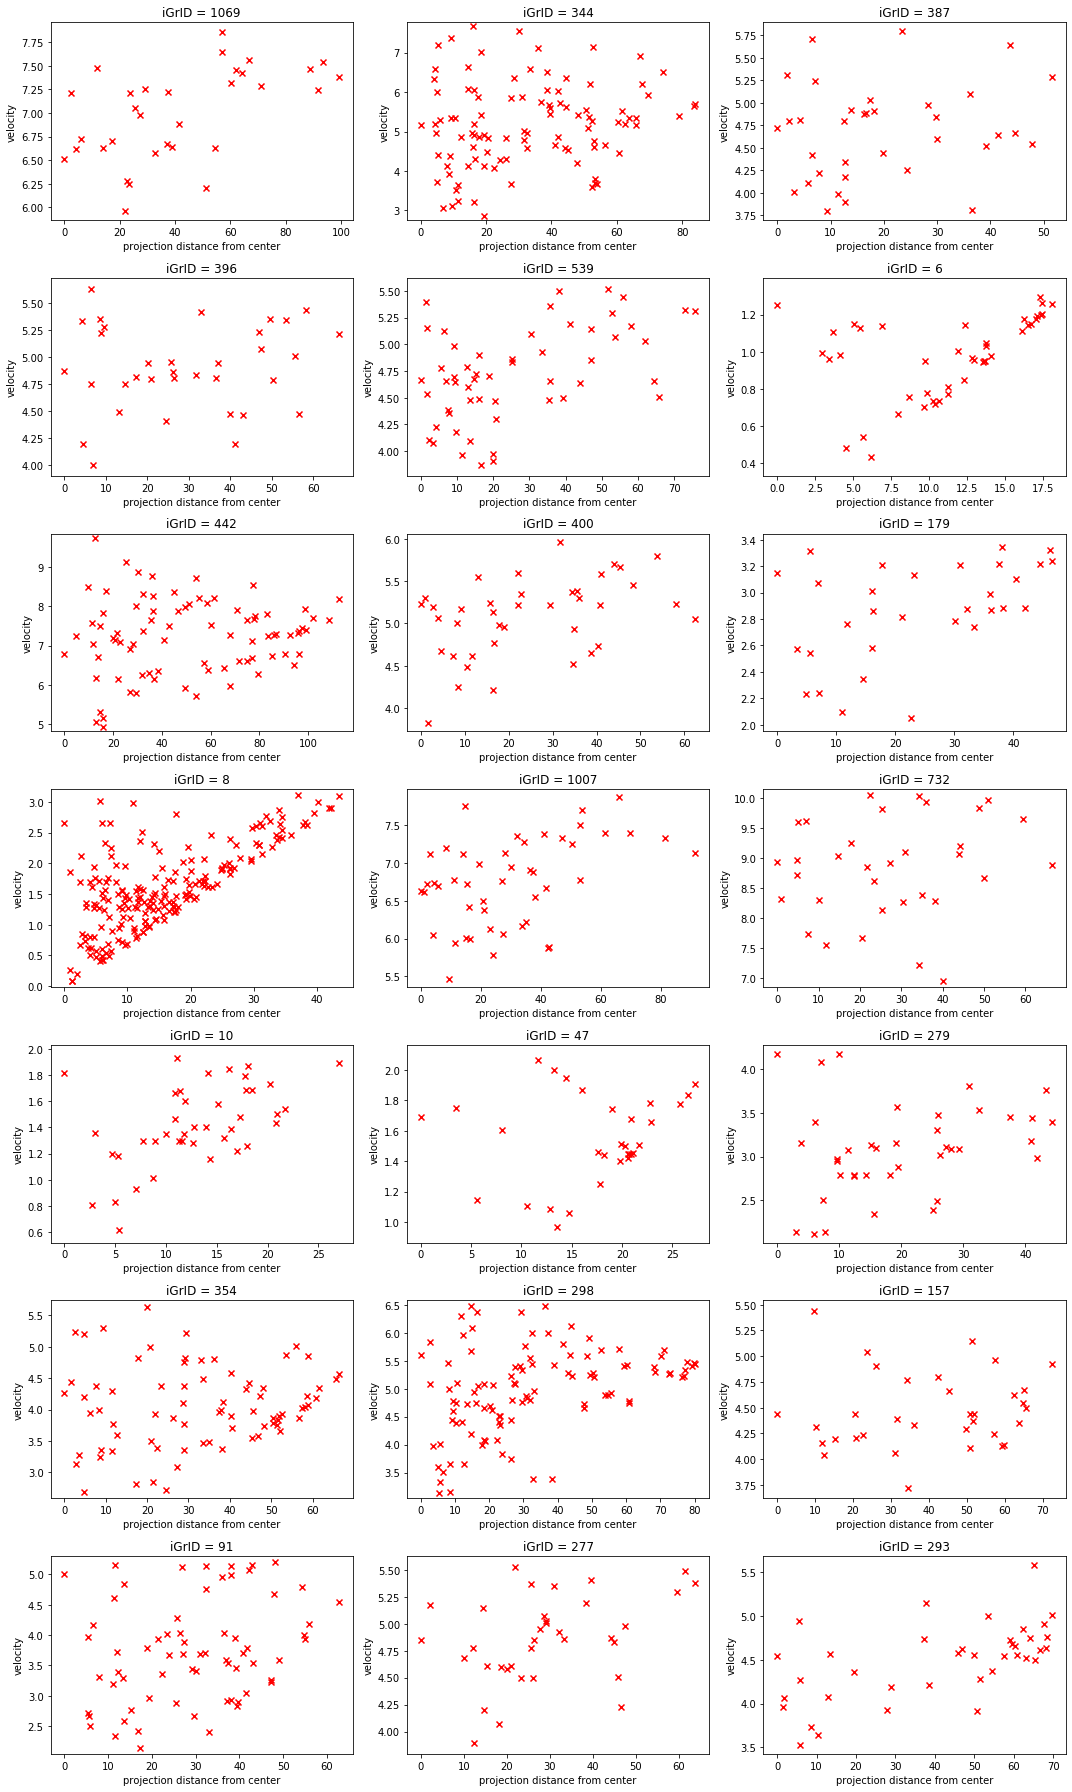

In [210]:
fig, axs = plt.subplots(7, 3, figsize=(15,25))
GrIDs = g_2.iGrID.unique()
for i in range(21):
    drawPlot(g_2, GrIDs[i], axs[i//3, i%3], 'r')
plt.tight_layout()

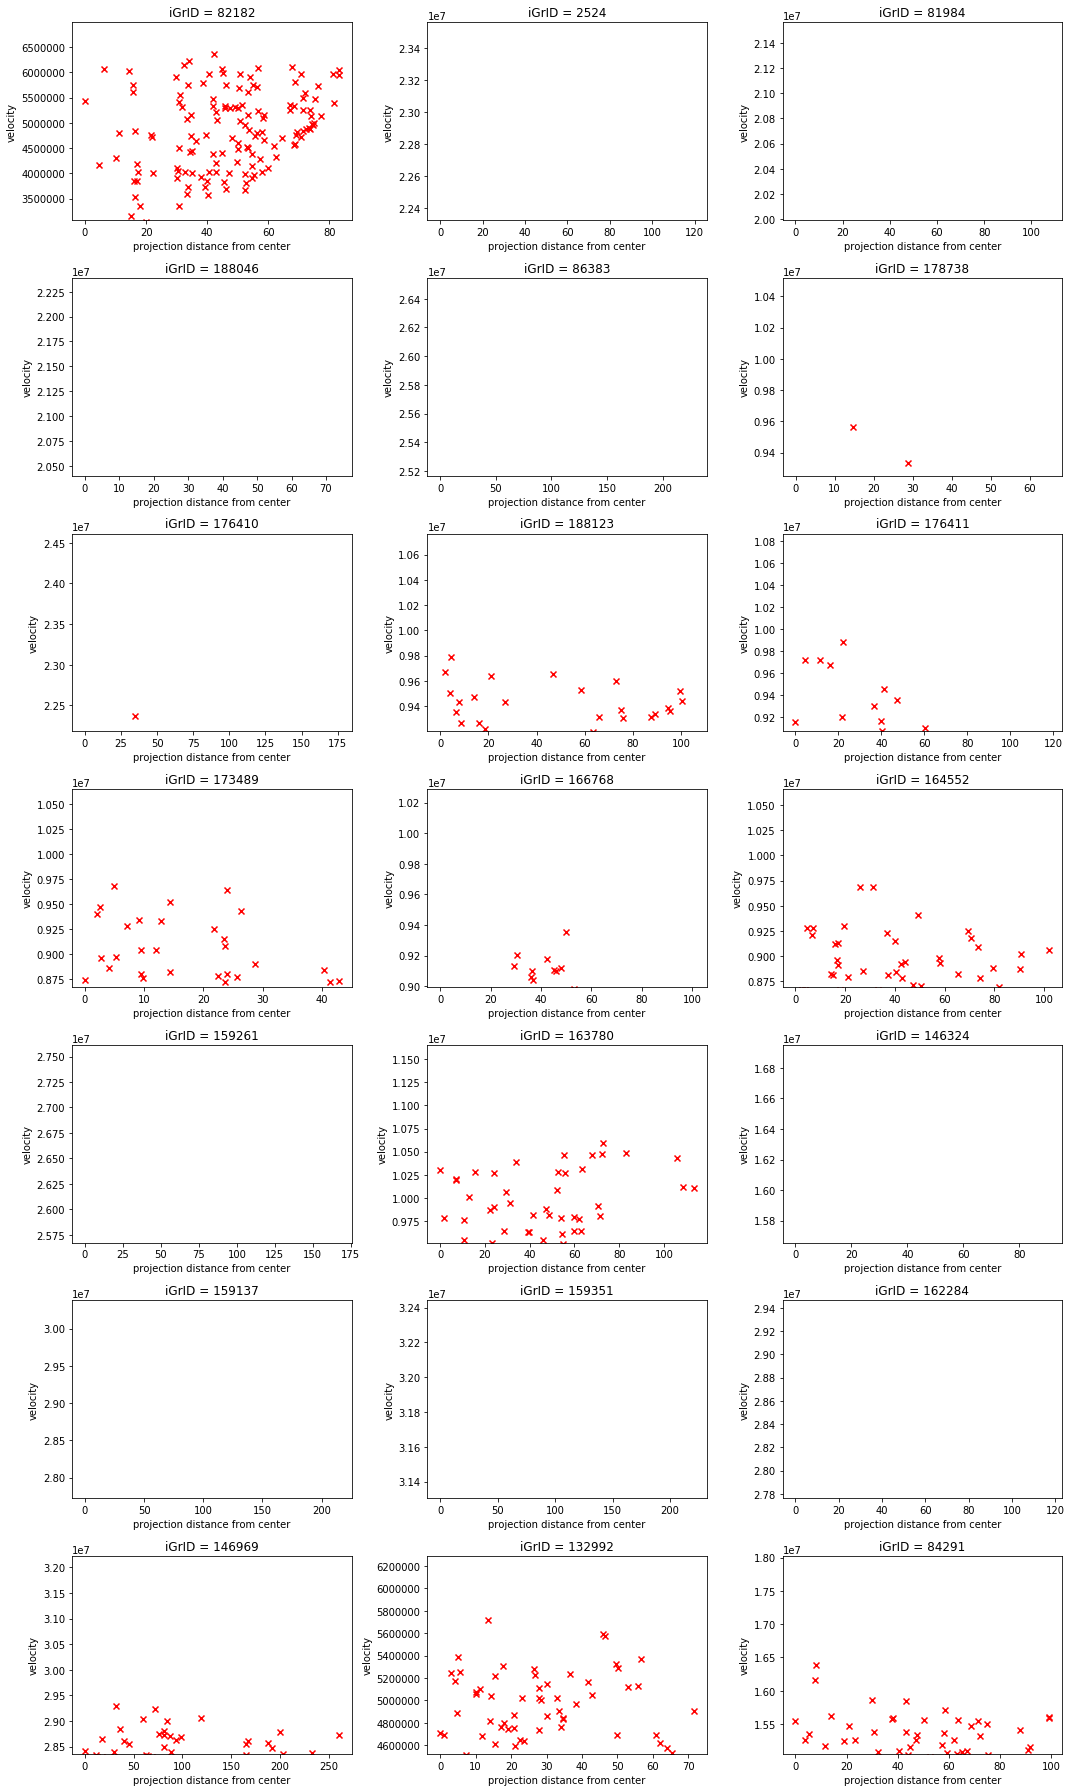

In [205]:
fig, axs = plt.subplots(7, 3, figsize=(15,25))
GrIDs = g_s.iGrID.unique()
for i in range(21):
    drawPlot(g_s, GrIDs[i], axs[i//3, i%3], 'r')
plt.tight_layout()

In [160]:
g_2.to_csv('g_2_with_dist.csv', index=False)
g_s.to_csv('g_s_with_dist.csv', index=False)